In [13]:
import math 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from tqdm import tqdm
import random

In [14]:
sigma = 0.05**2 #standred deviation
mean = 0

def gaussin(pos):
    x, y = pos
    return (1/(np.sqrt(2*np.pi)*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))

In [15]:
position = np.array((0,0))
position_array = []
step_size = 0.001

old_pos = position

def r_point():
    return random.uniform(-1*step_size, 1*step_size)

proposal = np.array((r_point(), r_point()))

print(proposal)

new_pos = old_pos + proposal

[-0.00028827  0.00076594]


In [16]:
prob_old = gaussin(old_pos)
prob_new = gaussin(new_pos)

flag = np.random.random()

ratio = prob_new/prob_old

if flag<ratio:
    position = position + proposal

In [17]:
N = 10000 #number of steps

for _ in tqdm(range(N)):

    old_pos = position

    proposal = np.array((r_point(), r_point()))


    new_pos = old_pos + proposal
    prob_old = gaussin(old_pos)
    prob_new = gaussin(new_pos)

    flag = np.random.random()

    ratio = prob_new/prob_old

    if flag<ratio:
        position = position + proposal
    
    position_array.append(position)

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 39660.35it/s]


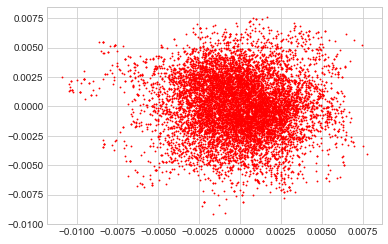

In [18]:
pos_array = np.array(position_array)
plt.scatter(pos_array[:,0], pos_array[:,1], s=0.7, color='r')